In [133]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [134]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [135]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session ### checkkk
from sqlalchemy.orm import sessionmaker ### checkkk 
from sqlalchemy import create_engine, func
# Import and establish Base for which classes will be constructed
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float , Boolean, DateTime

C:\Users\Isbelis\AppData\Local\Temp\ipykernel_16596\22983925.py:9: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [136]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [137]:
# reflect an existing database into a new model
# Declare a Base using 'automap_base()'
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [138]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [139]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [140]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [141]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

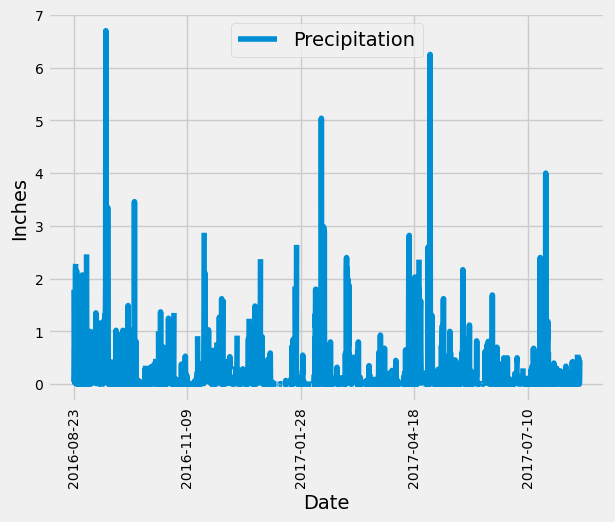

In [146]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# year_ago = dt.date(2017,8,23).year - 1, (lastDate.date).month, (lastDate.date).day)
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.prcp).filter(measurement.date >=year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x ="Date", y="Precipitation", rot=90, fontsize=10)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Inches", fontsize=14)

In [147]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [148]:
# Design a query to calculate the total number of stations in the dataset
total_stations= session.query(func.count(station.station)).scalar()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [149]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations_count= session.query(measurement.station, func.count(measurement.station)) \
                        .group_by(measurement.station) \
                        .order_by(func.count(measurement.station).desc()) \
                        .first()[0]

# Print the stations and their observation counts in descending order
for station, count in station_counts:
    print(f'Station: {station}, Observation Count: {count}')

Station: USC00519281, Observation Count: 2772
Station: USC00519397, Observation Count: 2724
Station: USC00513117, Observation Count: 2709
Station: USC00519523, Observation Count: 2669
Station: USC00516128, Observation Count: 2612
Station: USC00514830, Observation Count: 2202
Station: USC00511918, Observation Count: 1979
Station: USC00517948, Observation Count: 1372
Station: USC00518838, Observation Count: 511


In [150]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)) \
                .filter(measurement.station == most_active_stations_count ) \
                .all()

# Extract the results
lowest_temp, highest_temp, avg_temp = results[0]

print(f'Most Active Station ID: {most_active_stations_count}')
print(f'Lowest Temperature: {lowest_temp}')
print(f'Highest Temperature: {highest_temp}')
print(f'Average Temperature: {avg_temp}')

Most Active Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


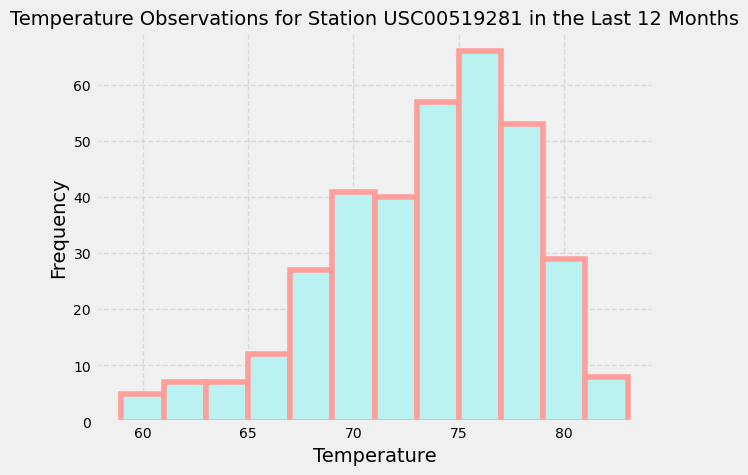

In [151]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_id= most_active_stations_count
query = f"""
SELECT date, tobs 
FROM measurement 
WHERE station = '{most_active_station_id}' 
AND date >= '{year_ago.strftime('%Y-%m-%d')}'
"""
df = pd.read_sql_query(query, engine)

# Plot the data as a histogram
plt.hist(df['tobs'], bins=12, edgecolor='#ff9f9b',color='#b9f2f0',linewidth=4)
plt.title(f'Temperature Observations for Station {most_active_station_id} in the Last 12 Months', fontsize=14)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
# Customize the ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Add grid
plt.grid(True, linestyle='--', alpha=0.6)



plt.show()

# Close Session

In [152]:
# Close Session
session.close()